In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('dataset/diabetes_binary_health_indicators_BRFSS2021.csv')

# Assuming df is your DataFrame and "Diabetes_binary" is your target column
class_0 = df[df.Diabetes_binary == 0]
class_1 = df[df.Diabetes_binary == 1]

# Downsample class 0 to match the number of instances in class 1
class_0_downsampled = class_0.sample(len(class_1))

# Concatenate the downsampled class 0 with class 1
balanced_df = pd.concat([class_0_downsampled, class_1], axis=0)



# Now, balanced_df is your balanced DataFrame

X = balanced_df.drop("Diabetes_binary", axis=1)
y = balanced_df["Diabetes_binary"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

balanced_df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1479,0.0,0,0.0,1,27.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,0,2,6.0,7.0
43583,0.0,0,0.0,0,25.0,1.0,0.0,0.0,1,1,1,0,1,1.0,3.0,0.0,0.0,1.0,0,4,5.0,5.0
153416,0.0,0,0.0,1,24.0,0.0,0.0,0.0,1,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0,1,6.0,7.0
81923,0.0,1,0.0,1,27.0,1.0,0.0,0.0,1,1,0,0,1,0.0,2.0,0.0,0.0,0.0,1,9,6.0,8.0
210793,0.0,0,0.0,1,29.0,0.0,0.0,0.0,1,1,1,0,1,0.0,3.0,0.0,0.0,0.0,1,9,6.0,9.0


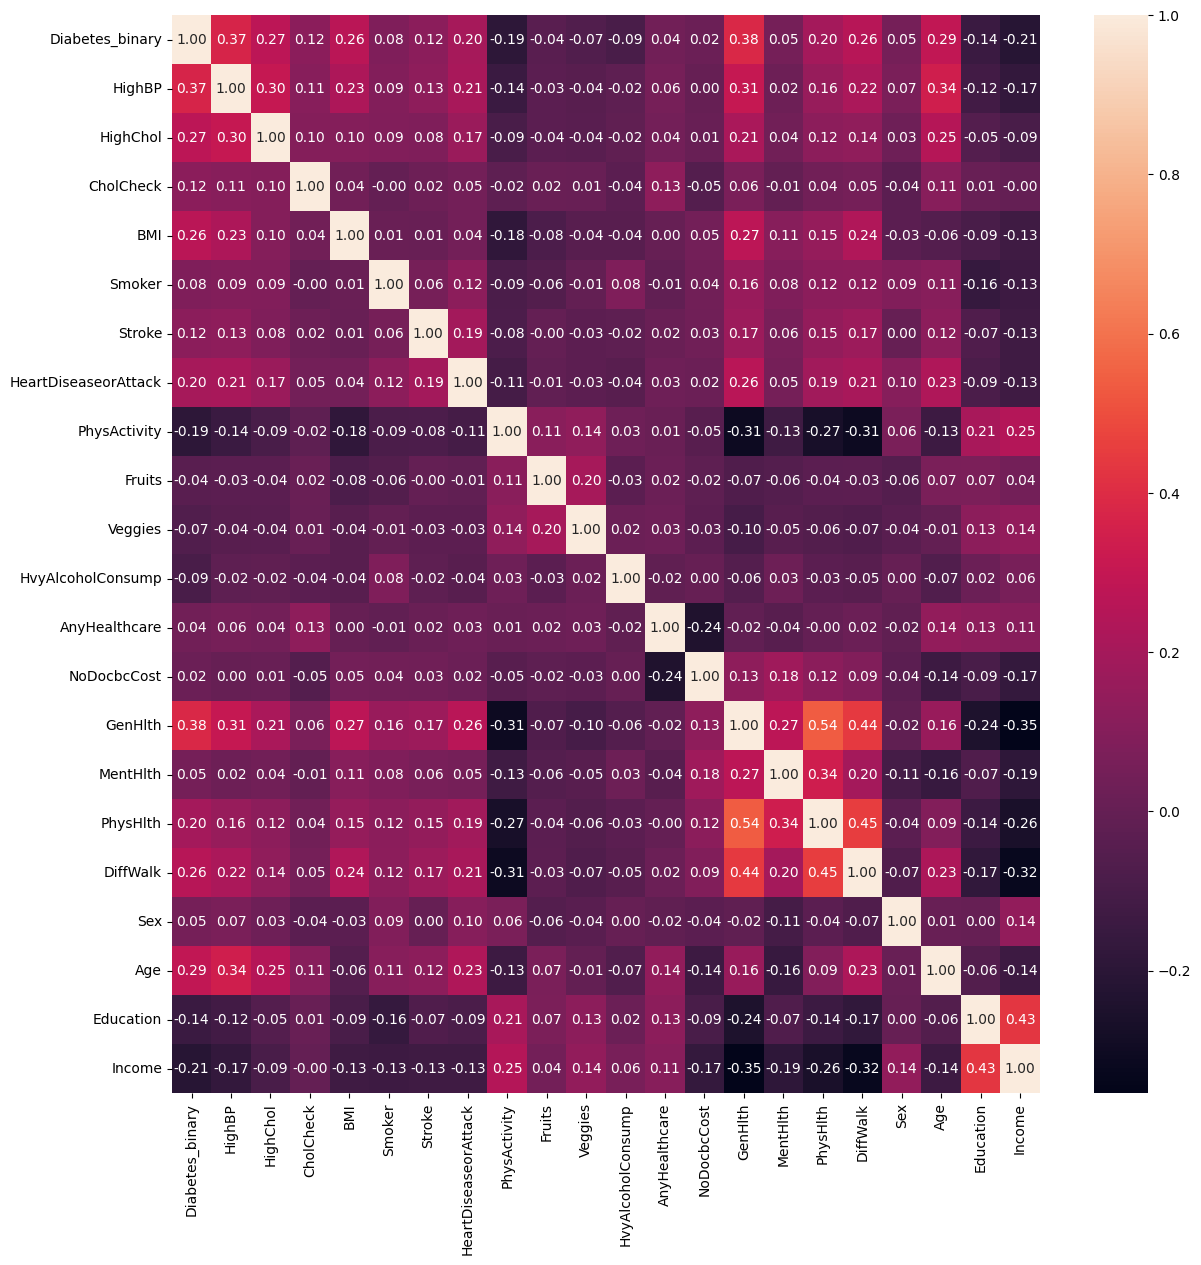

In [6]:
corr = balanced_df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

c:\Users\ensar\Desktop\Diabetes-Prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7346589216562407


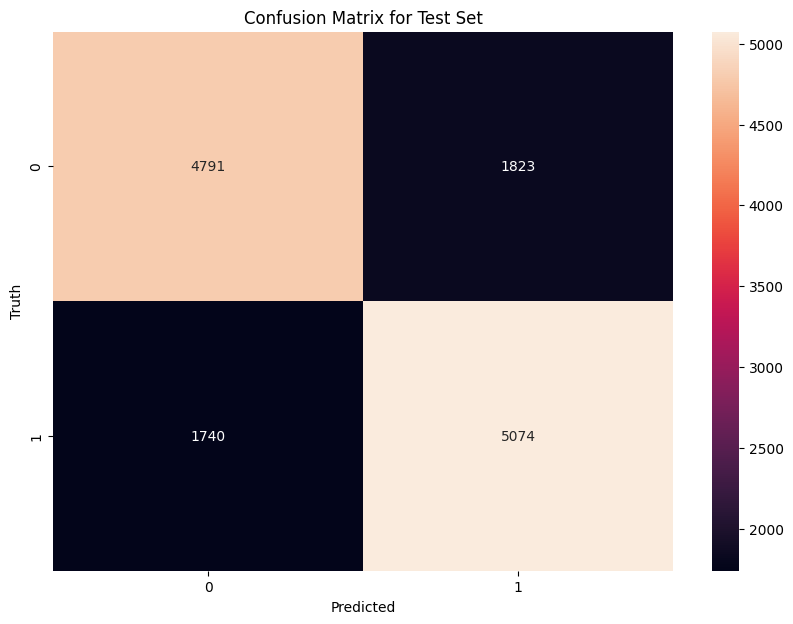

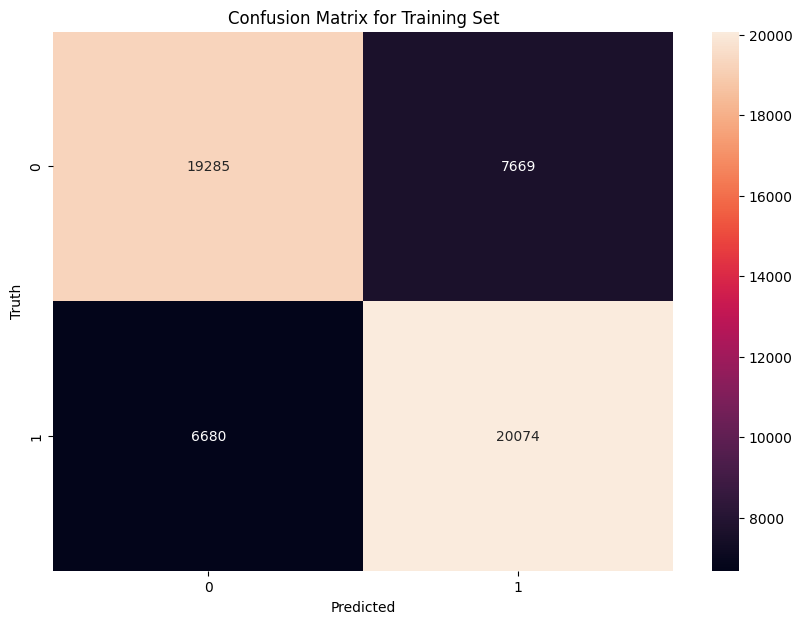

In [7]:
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
cmTest = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Test Set')

plt.show()

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Generate the confusion matrix for the training set
cmTrain = confusion_matrix(y_train, y_pred_train)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Training Set')

plt.show()


Accuracy: 0.7335418528448019


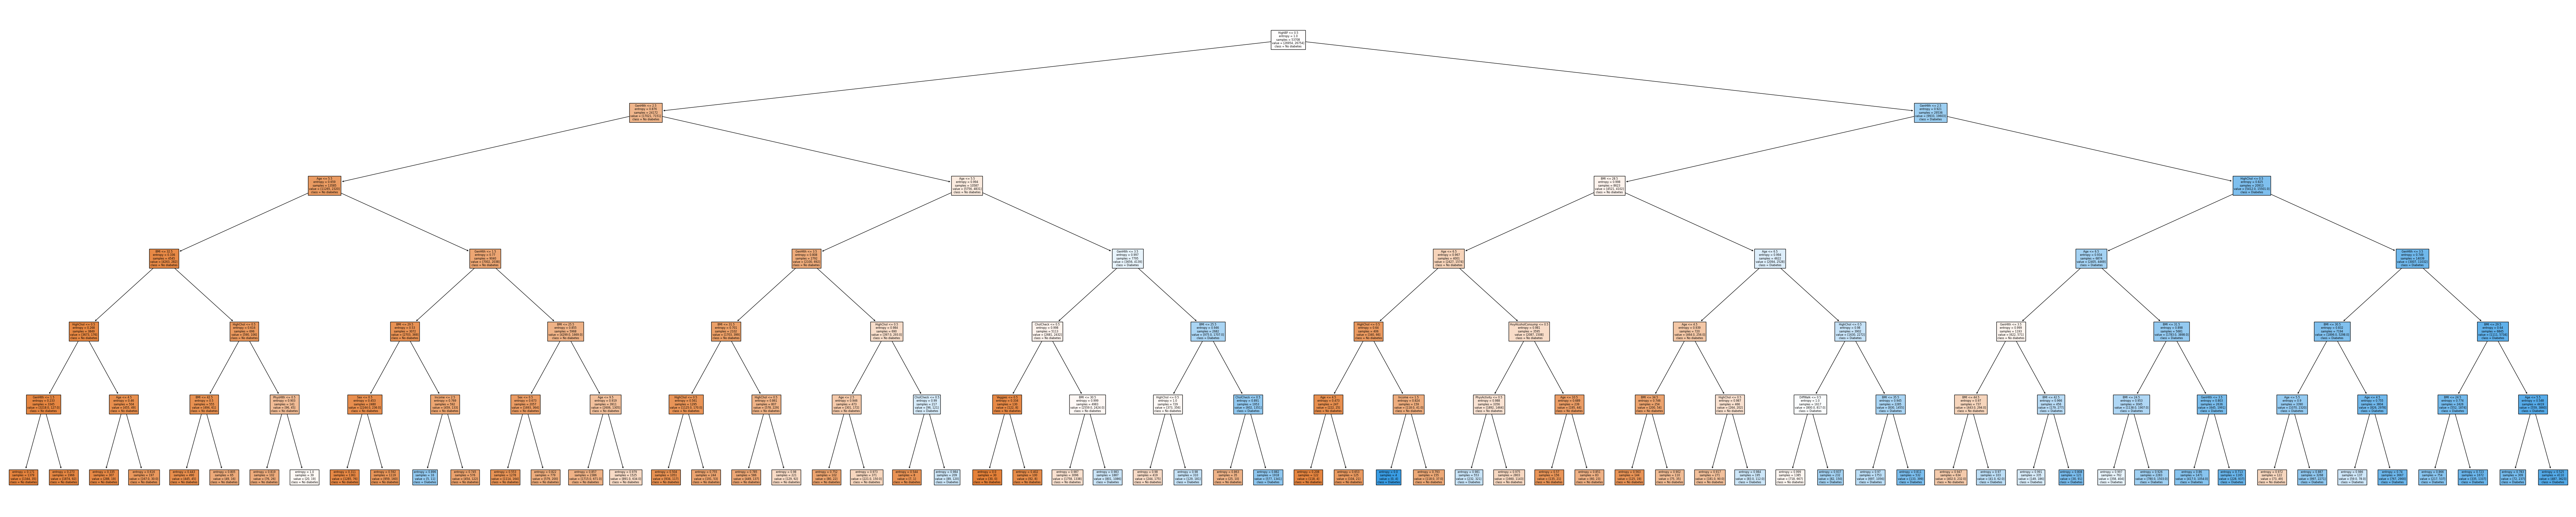

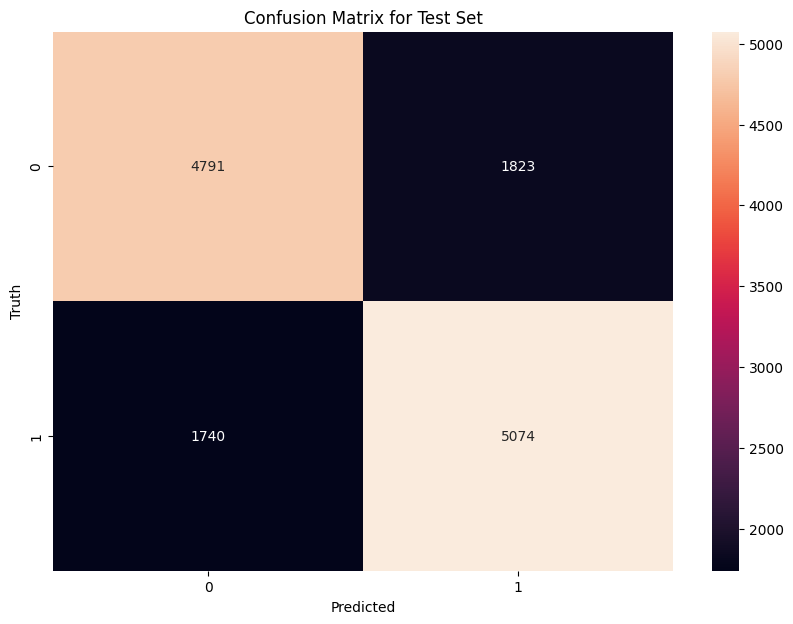

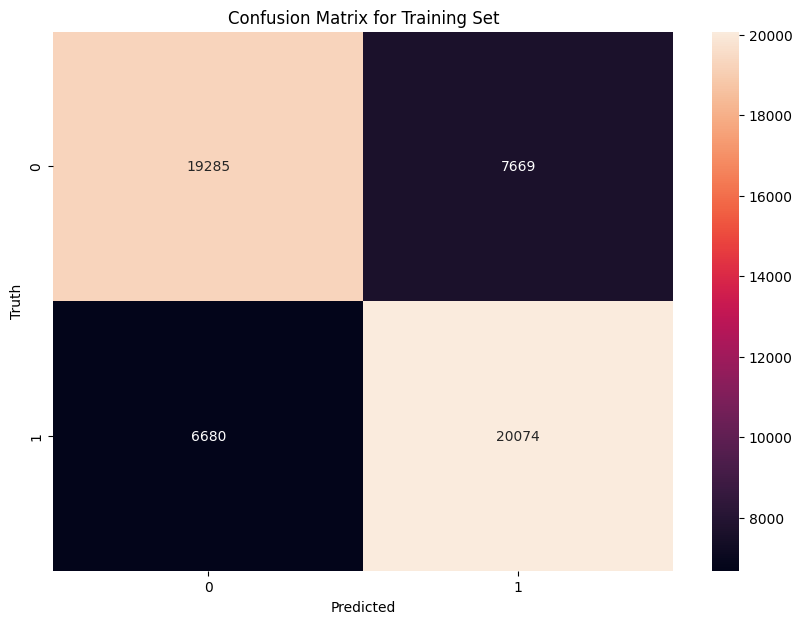

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model2 = DecisionTreeClassifier(random_state=123, criterion="entropy", max_depth=6)
model2.fit(X_train,y_train)
y_pread=model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pread)
print("Accuracy:", accuracy)

feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
                 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
                 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

class_names = ['No diabetes', 'Diabetes']

plt.figure(figsize=(100, 20))
plot_tree(model2, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

# Generate the confusion matrix
cmTest = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Test Set')

plt.show()

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Generate the confusion matrix for the training set
cmTrain = confusion_matrix(y_train, y_pred_train)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Training Set')

plt.show()

Accuracy: 0.6952636282394995


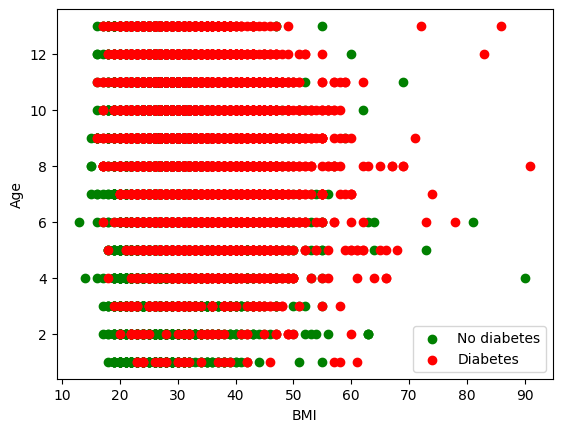

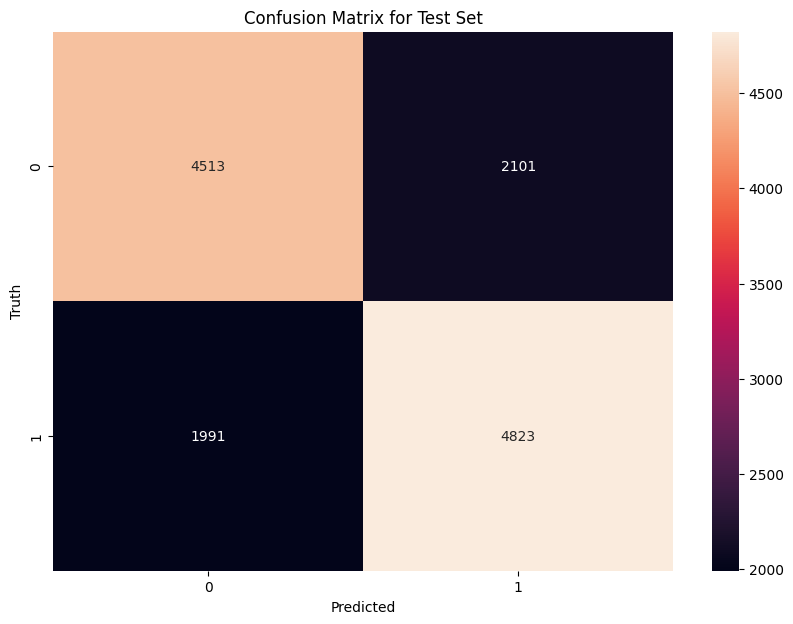

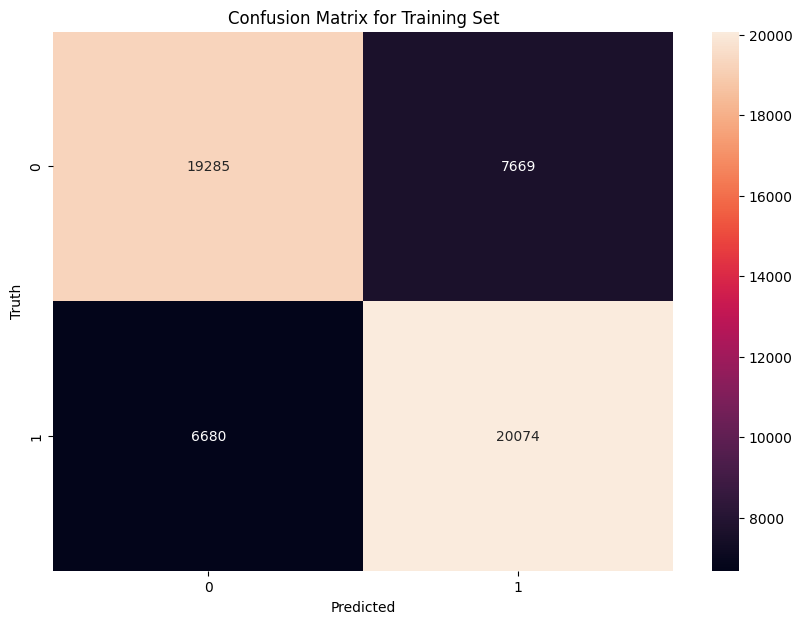

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Select two features for plotting
feature_1 = X_test['BMI']
feature_2 = X_test['Age']

# Create a color map
colors = ['green', 'red']

# Plot the results
for i, color in enumerate(colors):
    indices = y_test == i
    plt.scatter(feature_1[indices], feature_2[indices], c=color)

plt.legend(['No diabetes', 'Diabetes'])
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

# Generate the confusion matrix
cmTest = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Test Set')

plt.show()

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Generate the confusion matrix for the training set
cmTrain = confusion_matrix(y_train, y_pred_train)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Training Set')

plt.show()

Accuracy: 0.719690199582961


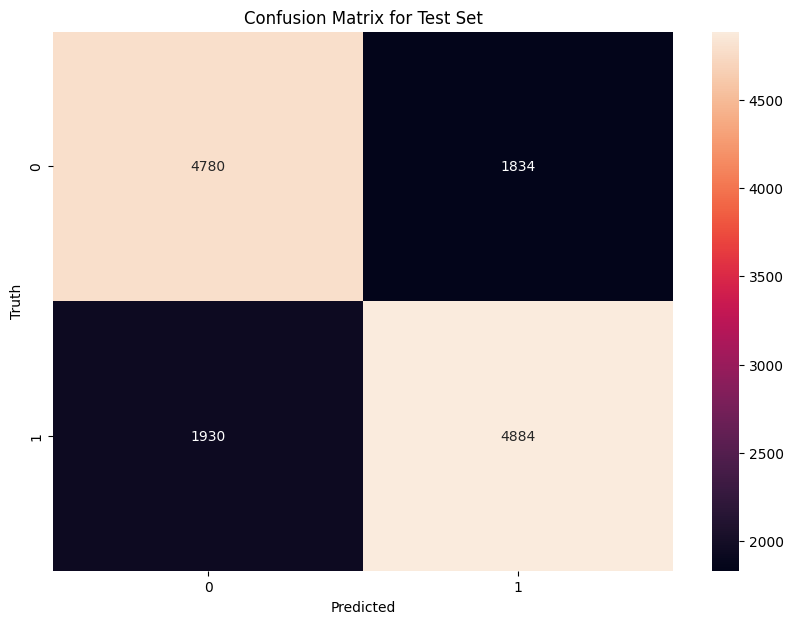

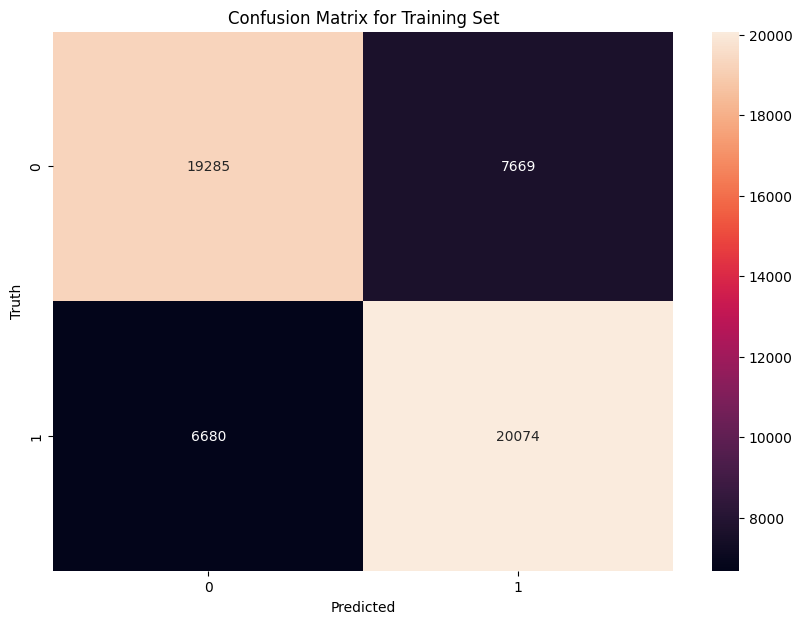

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generate the confusion matrix
cmTest = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Test Set')

plt.show()

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Generate the confusion matrix for the training set
cmTrain = confusion_matrix(y_train, y_pred_train)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Training Set')

plt.show()

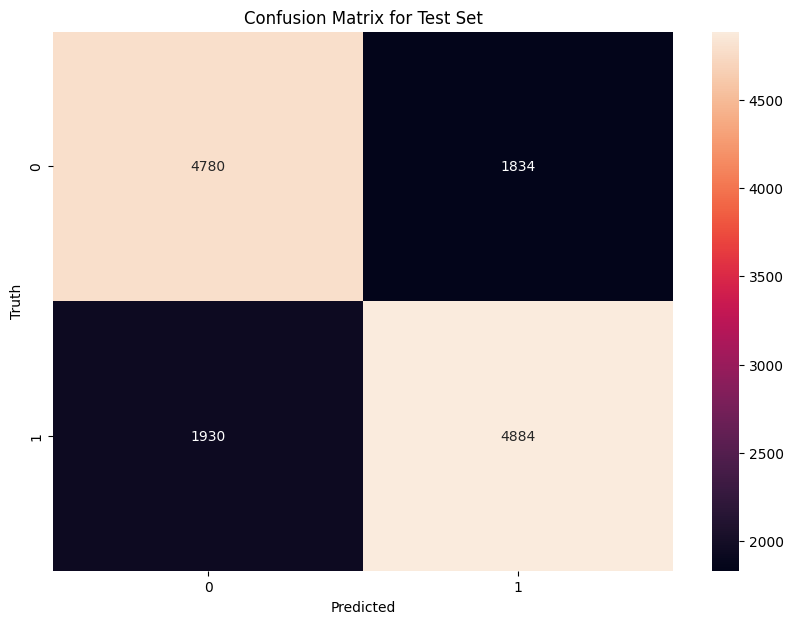

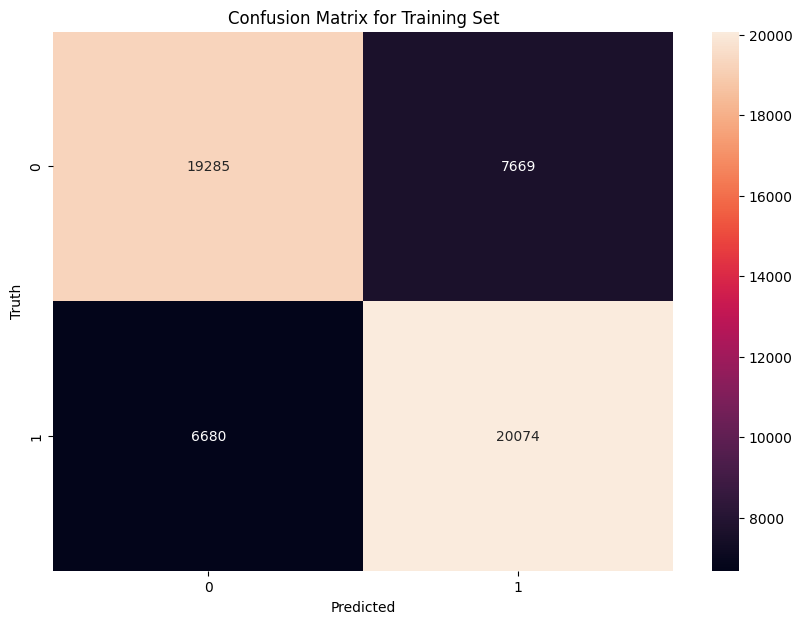

In [11]:
from sklearn.ensemble import RandomForestClassifier as randomForestClassifier
from sklearn.metrics import accuracy_score
rfc=randomForestClassifier()
rfc.fit(X_train,y_train)
rfctd=rfc.predict(X_test)
rfcaccuracy = accuracy_score(y_test, rfctd)
rfcaccuracy

# Generate the confusion matrix
cmTest = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Test Set')

plt.show()

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Generate the confusion matrix for the training set
cmTrain = confusion_matrix(y_train, y_pred_train)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cmTrain, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add a title
plt.title('Confusion Matrix for Training Set')

plt.show()